In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import networkx as nx
import math

df = pd.read_csv('/kaggle/input/water-quality-dataset-for-crop/water_quality_.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,NaN,204.890456,20791.31898,7.300212,368.516441,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0


In [2]:
# I saw multiple nulls
df = df.dropna()
df = df.drop_duplicates()

df = df.reset_index()
df = df.drop(['index'], axis=1)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
1,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.68774,7.544869,326.678363,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.71654,7.513408,393.663395,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.09176,4.563009,303.309771,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.41202,6.297312,312.931021,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.92035,7.708117,304.510230,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.82602,9.263166,258.930600,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.78019,7.747547,345.700257,12.067620,60.419921,3.669712,1


In [4]:
# Do something similar to https://www.kaggle.com/code/ajaypalsinghlo/waterqualitydataset-crop
# Then use PCA

# Code pulled from and inspired by 
# https://github.com/bphall/pca_sandbox/blob/master/pca_sandbox.ipynb
x = df.values
x_scale = StandardScaler().fit_transform(x)
x_scale

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x_scale)
principalComponents

pca2_df = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2','pca3','pca4'])
pca2_df

,pca1,pca2,pca3,pca4
0,-0.974891,-0.254471,0.418419,1.057275
1,-0.374680,-0.312056,-0.732591,-1.510847
2,0.847035,0.276397,-0.173799,0.917156
3,-1.857152,-1.503189,0.127110,1.349349
4,-0.566947,-0.972206,-0.669843,-0.457443
...,...,...,...,...
2006,-0.207868,-0.926332,1.074792,-1.660132
2007,0.030778,-0.456814,-0.278955,-1.695689
2008,1.574364,0.031750,0.515088,-1.169720
2009,0.732461,0.572359,0.658741,-0.243742


[Text(0.5, 0, 'Principal Component 1'),
 Text(0, 0.5, 'Principal Component 2'),
 Text(0.5, 1.0, 'Penguin Species Size and Mass')]

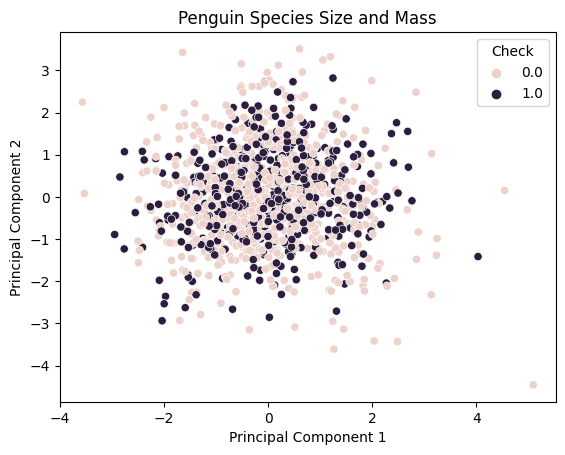

In [5]:
# Plotting
ax = sns.scatterplot(x=pca2_df.pca1, y=pca2_df.pca2, hue=df.Check)
ax.set(xlabel='Principal Component 1',ylabel='Principal Component 2',title='Penguin Species Size and Mass')

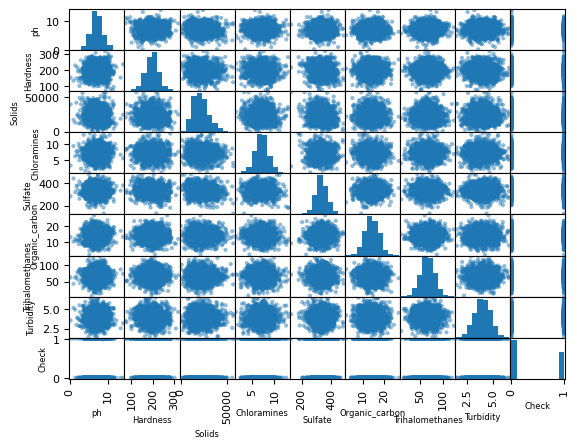

In [10]:
ax1 = pd.plotting.scatter_matrix(df)


# Credit: https://stackoverflow.com/questions/32121381/label-size-in-panda-plot-scatter-matrix
import matplotlib.pyplot as plt
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 6) for item in ax1.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 6) for item in ax1.ravel()];

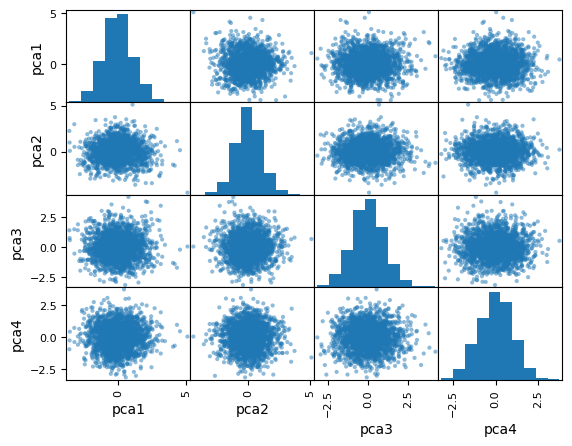

In [6]:
ax1 = pd.plotting.scatter_matrix(pca2_df)

In [ ]:
'''
    Since there is a lot of noise, we may want to change the 
    dataset to categorical, saying "High, Medium, and Low" for the various 
    attributes.
    
    We can then use a force directed graph to understand which yields a 
    healthy or unhealthy potato (Check 1/0)
    
    In order to determine what is low/med/high we can use the mean value
    or research into each attribute
'''

In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672410,13.127000,481.030642,27.006707,124.000000,6.494749,1.000000


In [4]:
'''
    ph - Mean: 7, Min: 0, Max: 14
    Hardness - Mean: 195, Min: 70, Max: 320
    Solids - Mean: 21920, Min: 320, Max: 56500
    Chloramines - Mean: 7, Min: 1, Max: 13
    Sulfate - Mean: 333, Min: 129, Max: 481
    Organic_carbon - Mean: 14, Min: 2, Max: 27
    Trihalomethanes - Mean: 66, Min: 8, Max: 124
    Turbidity - Mean: 4, Min: 1, Max: 7
    
    Now go through each, changing them to categorical, then drop duplicates
''' 

'\n    ph - Mean: 7, Min: 0, Max: 14\n    Hardness - Mean: 195, Min: 70, Max: 320\n    Solids - Mean: 21920, Min: 320, Max: 56500\n    Chloramines - Mean: 7, Min: 1, Max: 13\n    Sulfate - Mean: 333, Min: 129, Max: 481\n    Organic_carbon - Mean: 14, Min: 2, Max: 27\n    Trihalomethanes - Mean: 66, Min: 8, Max: 124\n    Turbidity - Mean: 4, Min: 1, Max: 7\n    \n    Now go through each, changing them to categorical, then drop duplicates\n'

In [3]:
p = df['ph']
L = []

for i in p:
    if i >= 8.5:
        L.append("Base")
    elif i > 5.5 and i < 8.5:
        L.append("Neutral")
    else:
        L.append("Acidic")
        
df['ph'] = pd.DataFrame(L, columns=['ph'])

# Repeat the process for the rest.
p = df['Hardness']
L = []
for i in p:
    if i >= 227:
        L.append('Hard')
    elif i > 163 and i < 227:
        L.append("Malleable")
    else:
        L.append('Soft')
df['Hardness'] = pd.DataFrame(L, columns=['Hardness'])


p = df['Solids'] # mineral content
L = []
for i in p:
    if i >= 30562:
        L.append('Rich') # Change
    elif i > 13278 and i < 30562:
        L.append("Average")
    else:
        L.append('Poor') # Change
df['Solids'] = pd.DataFrame(L, columns=['Solids'])

p = df['Chloramines']
L = []
for i in p:
    if i >= 8.5:
        L.append('Very Clean') # Change
    elif i > 5.5 and i < 8.5:
        L.append("Clean")
    else:
        L.append('Dirty') # Change
df['Chloramines'] = pd.DataFrame(L, columns=['Chloramines'])


p = df['Sulfate']
L = []
for i in p:
    if i >= 374:
        L.append('Much Sulfur') # Change
    elif i > 292 and i < 374:
        L.append("Sulfur")
    else:
        L.append('Little Sulfur') # Change
df['Sulfate'] = pd.DataFrame(L, columns=['Sulfate'])

p = df['Organic_carbon']
L = []
for i in p:
    if i >= 17:
        L.append('Much Carbon') # Change
    elif i > 11 and i < 17:
        L.append("Carbon")
    else:
        L.append('Little Carbon') # Change
df['Organic_carbon'] = pd.DataFrame(L, columns=['Organic_carbon'])

p = df['Trihalomethanes']
L = []
for i in p:
    if i >= 82:
        L.append('Much Haloforms') # Change
    elif i > 50 and i < 82:
        L.append("Haloforms")
    else:
        L.append('Few Haloforms') # Change
df['Trihalomethanes'] = pd.DataFrame(L, columns=['Trihalomethanes'])

p = df['Turbidity']
L = []
for i in p:
    if i >= 5:
        L.append('Very Cloudy') # Change
    elif i > 3 and i < 4:
        L.append("Cloudy")
    else:
        L.append('Clear') # Change
df['Turbidity'] = pd.DataFrame(L, columns=['Turbidity'])

p = df['Check']
L = []
for i in p:
    if i > 0:
        L.append('Healthy') # Change
    else:
        L.append('Unhealthy') # Change
df['Check'] = pd.DataFrame(L, columns=['Check'])

In [4]:
df.drop_duplicates()
df

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,Neutral,Malleable,Average,Clean,Sulfur,Much Carbon,Much Haloforms,Clear,Unhealthy
1,Base,Malleable,Average,Clean,Sulfur,Carbon,Few Haloforms,Clear,Unhealthy
2,Neutral,Malleable,Average,Clean,Sulfur,Little Carbon,Haloforms,Clear,Unhealthy
3,Base,Hard,Average,Clean,Much Sulfur,Carbon,Much Haloforms,Clear,Unhealthy
4,Base,Malleable,Average,Dirty,Sulfur,Carbon,Haloforms,Clear,Unhealthy
...,...,...,...,...,...,...,...,...,...
2006,Base,Malleable,Average,Clean,Sulfur,Little Carbon,Haloforms,Clear,Healthy
2007,Neutral,Malleable,Average,Clean,Sulfur,Carbon,Few Haloforms,Cloudy,Healthy
2008,Base,Soft,Rich,Very Clean,Little Sulfur,Carbon,Few Haloforms,Clear,Healthy
2009,Neutral,Malleable,Average,Clean,Sulfur,Carbon,Haloforms,Cloudy,Healthy


In [15]:
df.Check.describe()

count          2011
unique            2
top       Unhealthy
freq           1200
Name: Check, dtype: object

'ph'

In [4]:
# Create nodes
G = []
for x in range(len(df.columns)):
    G.append(nx.Graph())
for y in range(len(G)):
    for x in range(df['ph'].nunique()):
        G[y].add_node(df['ph'].unique()[x])
    for x in range(df['Hardness'].nunique()):
        G[y].add_node(df['Hardness'].unique()[x])
    for x in range(df['Solids'].nunique()):
        G[y].add_node(df['Solids'].unique()[x])
    for x in range(df['Chloramines'].nunique()):
        G[y].add_node(df['Chloramines'].unique()[x])
    for x in range(df['Sulfate'].nunique()):
        G[y].add_node(df['Sulfate'].unique()[x])
    for x in range(df['Organic_carbon'].nunique()):
        G[y].add_node(df['Organic_carbon'].unique()[x])
    for x in range(df['Trihalomethanes'].nunique()):
        G[y].add_node(df['Trihalomethanes'].unique()[x])
    for x in range(df['Turbidity'].nunique()):
        G[y].add_node(df['Turbidity'].unique()[x])
    for x in range(df['Check'].nunique()):
        G[y].add_node(df['Check'].unique()[x])
    
    # Add edges
    for x in range(len(df['ph'])):
        
        G[y].add_edge(df[df.columns[y]][x],df['Check'][x])
        G[y].add_edge(df[df.columns[y]][x],df['ph'][x])
        G[y].add_edge(df[df.columns[y]][x],df['Hardness'][x])
        G[y].add_edge(df[df.columns[y]][x],df['Solids'][x])
        G[y].add_edge(df[df.columns[y]][x],df['Trihalomethanes'][x])
        G[y].add_edge(df[df.columns[y]][x],df['Turbidity'][x])
        G[y].add_edge(df[df.columns[y]][x],df['Sulfate'][x])
        G[y].add_edge(df[df.columns[y]][x],df['Organic_carbon'][x])
        G[y].add_edge(df[df.columns[y]][x],df['Chloramines'][x])
    
    

#node_adj = []
#for node, adjacencies in enumerate(G.adjacency()):
#    node_adj.append(len(adjacencies[1])*5)
    
#nx.draw(G, node_size = node_adj)

In [20]:
#nx.draw_planar(G) # Errors, G isn't planar
pos = []
for x in range(len(G)):
    pos.append(nx.spring_layout(G[x], k=0.25, iterations=50))

In [21]:
F = []
for x in range(len(df.columns)):
    F.append(nx.Graph())

for y in range(len(F)):
    
    for x in range(df['ph'].nunique()):
        F[y].add_node(df['ph'].unique()[x], pos = pos[y][df['ph'].unique()[x]])
    for x in range(df['Hardness'].nunique()):
        F[y].add_node(df['Hardness'].unique()[x], pos = pos[y][df['Hardness'].unique()[x]])
    for x in range(df['Solids'].nunique()):
        F[y].add_node(df['Solids'].unique()[x], pos = pos[y][df['Solids'].unique()[x]])
    for x in range(df['Chloramines'].nunique()):
        F[y].add_node(df['Chloramines'].unique()[x], pos = pos[y][df['Chloramines'].unique()[x]])
    for x in range(df['Sulfate'].nunique()):
        F[y].add_node(df['Sulfate'].unique()[x], pos = pos[y][df['Sulfate'].unique()[x]])
    for x in range(df['Organic_carbon'].nunique()):
        F[y].add_node(df['Organic_carbon'].unique()[x], pos = pos[y][df['Organic_carbon'].unique()[x]])
    for x in range(df['Trihalomethanes'].nunique()):
        F[y].add_node(df['Trihalomethanes'].unique()[x], pos = pos[y][df['Trihalomethanes'].unique()[x]])
    for x in range(df['Turbidity'].nunique()):
        F[y].add_node(df['Turbidity'].unique()[x], pos = pos[y][df['Turbidity'].unique()[x]])
    for x in range(df['Check'].nunique()):
        F[y].add_node(df['Check'].unique()[x], pos = pos[y][df['Check'].unique()[x]])

    # Add edges
    for x in range(len(df['ph'])):
        F[y].add_edge(df[df.columns[y]][x],df['ph'][x])
        F[y].add_edge(df[df.columns[y]][x],df['Hardness'][x])
        F[y].add_edge(df[df.columns[y]][x],df['Solids'][x])
        F[y].add_edge(df[df.columns[y]][x],df['Trihalomethanes'][x])
        F[y].add_edge(df[df.columns[y]][x],df['Turbidity'][x])
        F[y].add_edge(df[df.columns[y]][x],df['Sulfate'][x])
        F[y].add_edge(df[df.columns[y]][x],df['Organic_carbon'][x])
        F[y].add_edge(df[df.columns[y]][x],df['Chloramines'][x])
        F[y].add_edge(df[df.columns[y]][x],df['Check'][x])

In [31]:
# Source: https://plotly.com/python/network-graphs/
# Source: https://github.com/lforeman2/plotlyDropDownMenu/blob/main/plotlyDemo_groupedHistogram.ipynb
title = "Home\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t<Click Trace to hide>"

plotColumns=df.columns

traces = []
buttons = []
m=0
for i, col in enumerate(plotColumns):
    visible = [False] * (len(plotColumns) * 3 +1)
    name=col
    edge_x = []
    edge_y = []
    for edge in F[i].edges():
        x0, y0 = F[i].nodes[edge[0]]['pos']
        x1, y1 = F[i].nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    traces.append(go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines',
        visible = False
    ))

    node_x = []
    node_y = []
    for node in F[i].nodes():
        x, y = F[i].nodes[node]['pos']
        node_x.append(x)
        node_y.append(y)


    node_adjacencies = []
    node_adjacencies_morphed = []
    node_text = []
    node_text_morphed = []
    for node, adjacencies in enumerate(F[i].adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(str(adjacencies[0])+' # of connections: '+str(len(adjacencies[1])))
        node_adjacencies_morphed.append(9*math.log2(len(adjacencies[1]))+8)
        if len(adjacencies[1]) > 19:
            node_text_morphed.append(str(adjacencies[0]))
        else:
            node_text_morphed.append("")

    traces.append(go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        text=node_text,
        visible=False,
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='YlGnBu',
            reversescale=True,
            color=node_adjacencies,
            size=node_adjacencies_morphed,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right',
            ),
            line_width=2,)))



    traces.append(go.Scatter(
        x=node_x, y=node_y,
        mode='text',
        text=node_text_morphed,
        visible=False,
        textfont=dict(
            color='black',
            family='Arial',
            size=14,
        )
    ))
    if i == 0:
        # maybe add an average overall country thingy
        vis = [False] * (len(plotColumns) * 3 +1)
        vis[len(plotColumns) * 3] = True
        buttons.append(dict(label="Home",
                        method="update",
                        args=[{"visible":vis},
                              {"title":f"{(title)}"}]))
    
    visible[m] = True
    m+=1
    visible[m] = True
    m+=1
    visible[m] = True
    m+=1
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"{(name)}"}]))

# Home, average of all countries
traces.append(
        go.Scatter( 
            x=node_x, y=node_y,
            mode='markers',
            hoverinfo='text',
            text=node_text,
            visible=True,
            marker=dict(
                showscale=True,
                # colorscale options
                #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
                #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
                #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
                colorscale='YlGnBu',
                reversescale=True,
                color=node_adjacencies,
                size=node_adjacencies_morphed,
                colorbar=dict(
                    thickness=15,
                    title='Node Connections',
                    xanchor='left',
                    titleside='right',
                ),
                line_width=2,)
        )
    )

updatemenus = [{'active':0, "buttons":buttons}]

fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus))
fig.update_layout(title=title, barmode='overlay')
fig.update_xaxes(visible=False, showticklabels=False)
fig.update_yaxes(visible=False, showticklabels=False)
fig.show()
fig.write_html("demowidget.html")